#Load Dataset

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Dataset_Skripsi/Daun'

Mounted at /content/drive


#Load Library

In [ ]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import Input
from tensorflow.keras.layers import  MaxPooling2D, Dense, Dropout, Conv2D, MaxPool2D, Flatten, Reshape, BatchNormalization, Add, GlobalAveragePooling2D, ZeroPadding2D, AveragePooling2D, Activation
from tensorflow.keras.activations import relu, softmax, swish, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD,RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision,SensitivityAtSpecificity, SpecificityAtSensitivity, Metric, TruePositives,FalseNegatives, Recall
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ResNet50V2, ResNet101
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.python.keras.utils import metrics_utils
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from google.colab import files
from keras.applications.vgg16 import preprocess_input
from sklearn.utils import shuffle, resample
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping, ModelCheckpoint,CSVLogger, ReduceLROnPlateau, LearningRateScheduler
import datetime
from sklearn.metrics import accuracy_score, classification_report
from keras import backend as K
import random
from sklearn.model_selection import train_test_split,  StratifiedShuffleSplit
!pip install pycm==3.1
%load_ext tensorboard
from pycm import *

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#Create Label

In [ ]:
df = None
for label in os.listdir(data_dir):
  data = []
  for img_filename in os.listdir(data_dir + '/' + label):
    filename, ext = os.path.splitext(img_filename)
    label_folder = os.path.join(data_dir, label)
    src_img_filepath = os.path.join(label_folder, img_filename)
    data.append(src_img_filepath)
  new_df = pd.DataFrame(data, columns=['path',])
  new_df['label'] = label
  df = pd.concat([df, new_df])
df

path        label
0   /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
1   /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
2   /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
3   /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
4   /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
..                                                ...          ...
95  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier
96  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier
97  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier
98  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier
99  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier

[2300 rows x 2 columns]

#Split Data

In [ ]:
df_train_val, df_test = train_test_split(df, random_state=666, test_size=0.1 )
df_train_val.to_csv('/content/drive/MyDrive/Dataset_Skripsi/train_label.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/Dataset_Skripsi/test_label.csv', index=False)
image_size=(224, 224)

In [ ]:
df_test_2 = pd.read_csv('/content/drive/MyDrive/Dataset_Skripsi/test_uji_3.csv')


In [ ]:
df_test_2

path    label
0   /content/drive/MyDrive/Dataset_Skripsi/uji/cat...  catalpa
1   /content/drive/MyDrive/Dataset_Skripsi/uji/cat...  catalpa
2   /content/drive/MyDrive/Dataset_Skripsi/uji/cat...  catalpa
3   /content/drive/MyDrive/Dataset_Skripsi/uji/cat...  catalpa
4   /content/drive/MyDrive/Dataset_Skripsi/uji/ace...     acer
..                                                ...      ...
95  /content/drive/MyDrive/Dataset_Skripsi/uji/til...    tilia
96  /content/drive/MyDrive/Dataset_Skripsi/uji/sty...   styrax
97  /content/drive/MyDrive/Dataset_Skripsi/uji/sty...   styrax
98  /content/drive/MyDrive/Dataset_Skripsi/uji/sty...   styrax
99  /content/drive/MyDrive/Dataset_Skripsi/uji/sty...   styrax

[100 rows x 2 columns]

In [ ]:
df_train_val

path        label
97  /content/drive/MyDrive/Dataset_Skripsi/Daun/ul...        ulmus
90  /content/drive/MyDrive/Dataset_Skripsi/Daun/ae...     aesculus
0   /content/drive/MyDrive/Dataset_Skripsi/Daun/pi...        picea
43  /content/drive/MyDrive/Dataset_Skripsi/Daun/ac...         acer
65  /content/drive/MyDrive/Dataset_Skripsi/Daun/ma...     magnolia
..                                                ...          ...
93  /content/drive/MyDrive/Dataset_Skripsi/Daun/ti...        tilia
70  /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...        carya
50  /content/drive/MyDrive/Dataset_Skripsi/Daun/ti...        tilia
22  /content/drive/MyDrive/Dataset_Skripsi/Daun/ti...        tilia
84  /content/drive/MyDrive/Dataset_Skripsi/Daun/am...  amelanchier

[2070 rows x 2 columns]

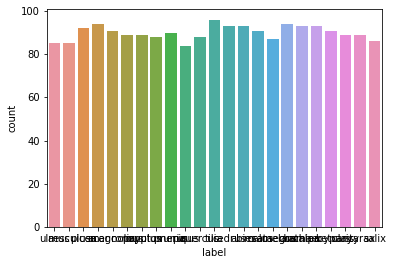

In [ ]:
ax = sns.countplot(x="label", data=df_train_val,)
plt.show()

In [ ]:
df_test

path      label
62  /content/drive/MyDrive/Dataset_Skripsi/Daun/ca...      carya
24  /content/drive/MyDrive/Dataset_Skripsi/Daun/ma...      malus
50  /content/drive/MyDrive/Dataset_Skripsi/Daun/co...     cornus
46  /content/drive/MyDrive/Dataset_Skripsi/Daun/ul...      ulmus
52  /content/drive/MyDrive/Dataset_Skripsi/Daun/ma...      malus
..                                                ...        ...
28  /content/drive/MyDrive/Dataset_Skripsi/Daun/ac...       acer
3   /content/drive/MyDrive/Dataset_Skripsi/Daun/cr...  crataegus
3   /content/drive/MyDrive/Dataset_Skripsi/Daun/ma...   magnolia
58  /content/drive/MyDrive/Dataset_Skripsi/Daun/cr...  crataegus
43  /content/drive/MyDrive/Dataset_Skripsi/Daun/sa...      salix

[230 rows x 2 columns]

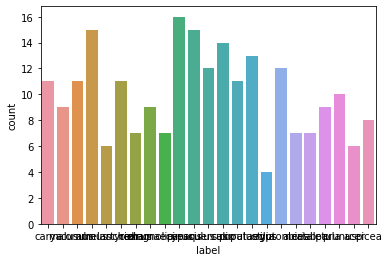

In [ ]:
ax = sns.countplot(x="label", data=df_test,)
plt.show()

#VGG-16 With (input 224 Filter 32 )


In [ ]:
model = keras.Sequential()

# Creating first block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 32, kernel_size= (3,3), strides= (1,1), padding='same', input_shape= (224, 224, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 32, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating second block- (2 Convolution + 1 Max pool)
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating third block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fourth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Creating fifth block- (3 Convolution + 1 Max pool)
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters= 512, kernel_size= (3,3), strides= (1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size= (2,2), strides=(2,2)))

# Flattening the pooled image pixels
model.add(Flatten())

# Creating 2 Dense Layers
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units= 4096, activation='relu'))
model.add(Dropout(rate=0.5))
# Creating an output layer
model.add(Dense(units= 23, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      2

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,)
train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val, 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 

class_names = train_generator.class_indices
print(class_names)
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  # print(image_batch[0].shape)
  # zz.fit(image_batch)
  break

Found 2070 validated image filenames belonging to 23 classes.
{'abies': 0, 'acer': 1, 'aesculus': 2, 'amelanchier': 3, 'betula': 4, 'carya': 5, 'catalpa': 6, 'cedrus': 7, 'chamaecyparis': 8, 'cornus': 9, 'crataegus': 10, 'cryptomeria': 11, 'magnolia': 12, 'malus': 13, 'picea': 14, 'pinus': 15, 'populus': 16, 'prunus': 17, 'quercus': 18, 'salix': 19, 'styrax': 20, 'tilia': 21, 'ulmus': 22}
(32, 224, 224, 3)
(32, 23)


##PERCOBAAN 1

###CROSS VALIDATION EVALUASI 1

In [ ]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['val_accuracy'])
  plt.title('model performance')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
  plt.show()
  ##
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

###K = 1

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')

      model_checkpoint_callback = ModelCheckpoint(
        filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
        save_weights_only=False,
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        save_best_only=True)
      
      csvlogger = csv_filepath
      callbacks = []
      callbacks.append(csvlogger)
      callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)  
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 325ms/step - loss: 4.7300 - accuracy: 0.2190 - val_loss: 3.7533 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_1_model.h5
Epoch 2/100
59/59 [==============================] - 23s 387ms/step - loss: 2.4809 - accuracy: 0.4020 - val_loss: 5.0407 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 324ms/step - loss: 1.9791 - accuracy: 0.4954 - val_loss: 6.4193 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 319ms/step - loss: 1.4094 - accuracy: 0.6125 - val_loss: 6.0717 - val_accuracy: 0.0676

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        6        0        0        1        1        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        

2        0        0        7        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

3        0        0        0        8        0        0        0        0        0        0        0        0        0    

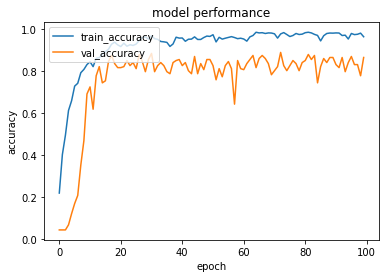

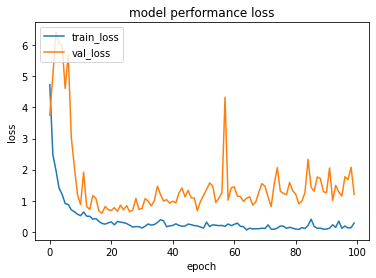

    epoch  accuracy     loss  val_accuracy  val_loss
72     72  0.976919  0.08622      0.888889   0.80909


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 2

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 22s 341ms/step - loss: 5.0684 - accuracy: 0.2233 - val_loss: 4.0491 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_2_model.h5
Epoch 2/100
59/59 [==============================] - 24s 412ms/step - loss: 2.4123 - accuracy: 0.4305 - val_loss: 4.2468 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 321ms/step - loss: 1.7750 - accuracy: 0.5287 - val_loss: 4.7141 - val_accuracy: 0.0483

Epoch 00003: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_2_model.h5
Epoch 4/100
59/59 [==============================] - 24s 404ms/step - l

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

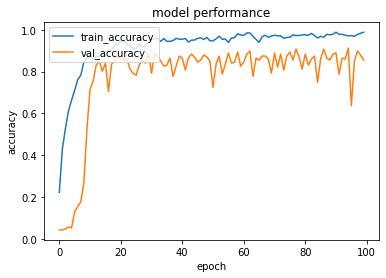

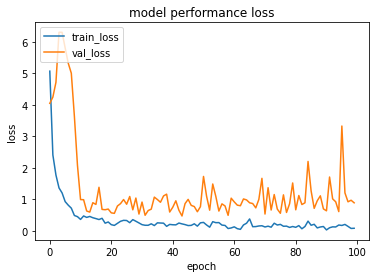

    epoch  accuracy      loss  val_accuracy  val_loss
94     94  0.970478  0.191057      0.913043  0.616035


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 3

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 325ms/step - loss: 4.8098 - accuracy: 0.2303 - val_loss: 4.7147 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_3_model.h5
Epoch 2/100
59/59 [==============================] - 21s 353ms/step - loss: 2.4162 - accuracy: 0.4187 - val_loss: 8.2500 - val_accuracy: 0.0483

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 20s 343ms/step - loss: 1.7368 - accuracy: 0.5566 - val_loss: 9.0007 - val_accuracy: 0.0483

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 19s 319ms/step - loss: 1.3956 - accuracy: 0.6125 - val_loss: 11.7037 - val_accuracy: 0.0531

Epoch 00

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

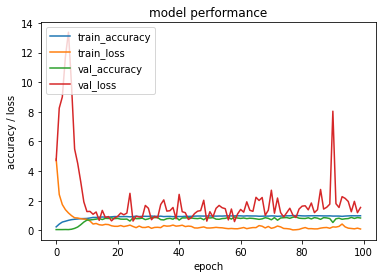

    epoch  accuracy     loss  val_accuracy  val_loss
58     58  0.975309  0.10689      0.903382  0.588016


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 4

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 1028s 17s/step - loss: 4.9933 - accuracy: 0.2152 - val_loss: 3.6732 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_4_model.h5
Epoch 2/100
59/59 [==============================] - 20s 340ms/step - loss: 2.6114 - accuracy: 0.4181 - val_loss: 4.7733 - val_accuracy: 0.0483

Epoch 00002: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_4_model.h5
Epoch 3/100
59/59 [==============================] - 23s 305ms/step - loss: 1.7396 - accuracy: 0.5405 - val_loss: 5.0758 - val_accuracy: 0.0193

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 18s 304ms/step - l

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        2        0        

2        0        2        6        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

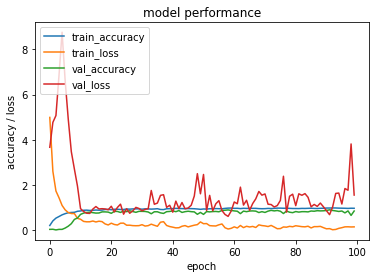

    epoch  accuracy      loss  val_accuracy  val_loss
91     91  0.987118  0.076373      0.908213  0.692291


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 5

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
     
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 18s 287ms/step - loss: 5.0036 - accuracy: 0.2271 - val_loss: 4.5344 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_5_model.h5
Epoch 2/100
59/59 [==============================] - 18s 304ms/step - loss: 2.4834 - accuracy: 0.4353 - val_loss: 5.4751 - val_accuracy: 0.0531

Epoch 00002: val_accuracy improved from 0.04348 to 0.05314, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_5_model.h5
Epoch 3/100
59/59 [==============================] - 18s 309ms/step - loss: 1.7225 - accuracy: 0.5341 - val_loss: 6.2501 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.05314
Epoch 4/100
59/59 [==============================] - 18s 311ms/step - l

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        1        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        

2        0        0        7        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        6        0        0        0        0        0        0        0        0        0    

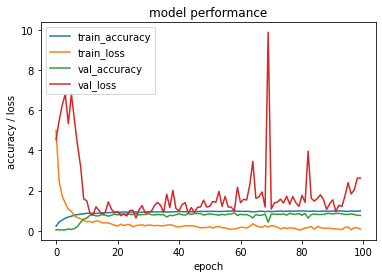

    epoch  accuracy      loss  val_accuracy  val_loss
58     58  0.979066  0.094703      0.888889  0.986158


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 6

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 303ms/step - loss: 5.0019 - accuracy: 0.2276 - val_loss: 4.1641 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_6_model.h5
Epoch 2/100
59/59 [==============================] - 19s 316ms/step - loss: 2.4886 - accuracy: 0.4240 - val_loss: 7.8537 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 17s 294ms/step - loss: 1.6763 - accuracy: 0.5819 - val_loss: 8.4866 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 17s 287ms/step - loss: 1.2848 - accuracy: 0.6339 - val_loss: 9.2041 - val_accuracy: 0.0435

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        9        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        2        7        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        10       0        0        0        0        0        0        0        0        0    

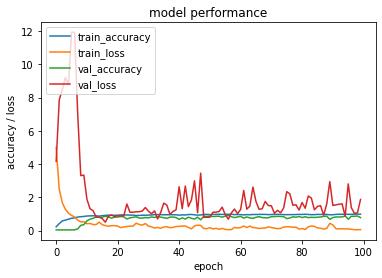

    epoch  accuracy      loss  val_accuracy  val_loss
56     56  0.985507  0.056921      0.917874  0.687078


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 7

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')

    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 292ms/step - loss: 4.9761 - accuracy: 0.2217 - val_loss: 4.2526 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_7_model.h5
Epoch 2/100
59/59 [==============================] - 17s 295ms/step - loss: 2.4814 - accuracy: 0.4316 - val_loss: 6.9309 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 319ms/step - loss: 1.7601 - accuracy: 0.5223 - val_loss: 5.2396 - val_accuracy: 0.0580

Epoch 00003: val_accuracy improved from 0.04348 to 0.05797, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_7_model.h5
Epoch 4/100
59/59 [==============================] - 18s 310ms/step - l

####EVALUASI

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        

2        0        1        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

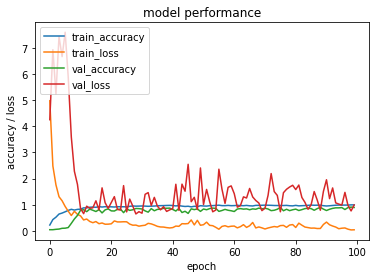

    epoch  accuracy     loss  val_accuracy  val_loss
98     98  0.993022  0.03516      0.908213  0.761048


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 8

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 292ms/step - loss: 4.8957 - accuracy: 0.2362 - val_loss: 4.1642 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_8_model.h5
Epoch 2/100
59/59 [==============================] - 18s 299ms/step - loss: 2.4687 - accuracy: 0.4353 - val_loss: 4.6037 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 320ms/step - loss: 1.8178 - accuracy: 0.5266 - val_loss: 4.2319 - val_accuracy: 0.0290

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 17s 291ms/step - loss: 1.3783 - accuracy: 0.6071 - val_loss: 5.2021 - val_accuracy: 0.0628

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

2        0        0        8        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        8        0        0        0        0        0        0        0        0        0    

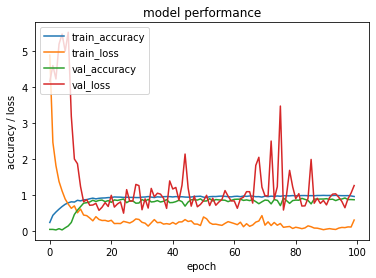

    epoch  accuracy      loss  val_accuracy  val_loss
76     76   0.98014  0.101529      0.917874  0.582789


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 9

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 304ms/step - loss: 5.1511 - accuracy: 0.1991 - val_loss: 3.9976 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_9_model.h5
Epoch 2/100
59/59 [==============================] - 18s 305ms/step - loss: 2.5531 - accuracy: 0.4074 - val_loss: 4.4418 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 315ms/step - loss: 1.7174 - accuracy: 0.5395 - val_loss: 5.7153 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 17s 287ms/step - loss: 1.3517 - accuracy: 0.6473 - val_loss: 9.2008 - val_accuracy: 0.0435

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

2        0        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        10       0        0        0        0        0        0        0        0        0    

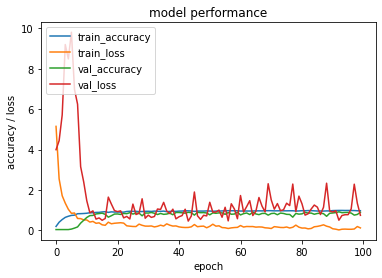

    epoch  accuracy      loss  val_accuracy  val_loss
92     92  0.990875  0.026266      0.922705  0.506272


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 10

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shaoe:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=image_size,
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=image_size,
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shaoe: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 626s 10s/step - loss: 4.9260 - accuracy: 0.2228 - val_loss: 4.5714 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model/_fold_10_model.h5
Epoch 2/100
59/59 [==============================] - 23s 390ms/step - loss: 2.2206 - accuracy: 0.4509 - val_loss: 7.8162 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 324ms/step - loss: 1.5069 - accuracy: 0.5819 - val_loss: 9.9390 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 317ms/step - loss: 1.3230 - accuracy: 0.6194 - val_loss: 9.1614 - val_accuracy: 0.0435

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        5        0        0        1        0        1        0        0        0        0        0        0        0        0        0        1        0        0        0        0        1        0        

2        0        0        8        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

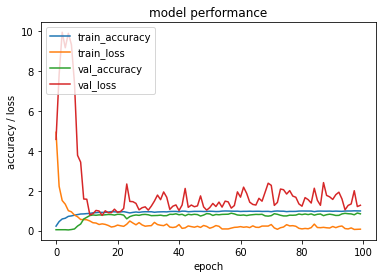

    epoch  accuracy      loss  val_accuracy  val_loss
98     98  0.986581  0.064513      0.879227  1.204541


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###EVALUASI KESELURUHAN

In [ ]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/Dataset_Skripsi/' +"model/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

##PERCOBAAN 2

###CROSS VALIDATION EVALUASI 2

In [ ]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['val_accuracy'])
  plt.title('model performance')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
  plt.show()
  ##
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

###K = 1

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 1016s 17s/step - loss: 4.7268 - accuracy: 0.2174 - val_loss: 4.0341 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_1_model.h5
Epoch 2/100
59/59 [==============================] - 36s 607ms/step - loss: 2.6599 - accuracy: 0.4058 - val_loss: 4.5853 - val_accuracy: 0.0483

Epoch 00002: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_1_model.h5
Epoch 3/100
59/59 [==============================] - 32s 545ms/step - loss: 1.7758 - accuracy: 0.5260 - val_loss: 5.0303 - val_accuracy: 0.0290

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 30s 513ms/step

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        0        0        1        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        

2        0        0        7        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        7        0        0        0        0        0        1        0        0        0    

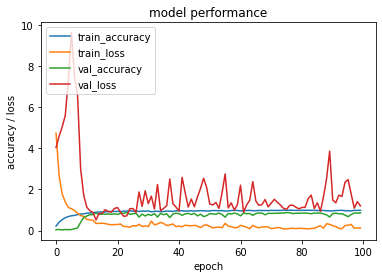

    epoch  accuracy      loss  val_accuracy  val_loss
23     23  0.941492  0.194614      0.874396  0.710852


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 2

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 560s 9s/step - loss: 4.8484 - accuracy: 0.2126 - val_loss: 3.8195 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_2_model.h5
Epoch 2/100
59/59 [==============================] - 23s 385ms/step - loss: 2.4099 - accuracy: 0.4106 - val_loss: 4.4950 - val_accuracy: 0.0338

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 19s 326ms/step - loss: 1.6300 - accuracy: 0.5400 - val_loss: 5.9207 - val_accuracy: 0.0580

Epoch 00003: val_accuracy improved from 0.04831 to 0.05797, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_2_model.h5
Epoch 4/100
59/59 [==============================] - 22s 369ms/step -

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        1        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

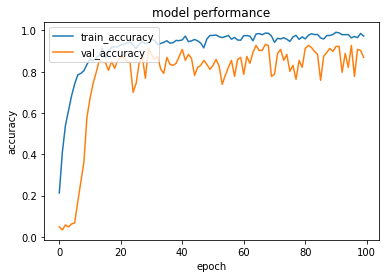

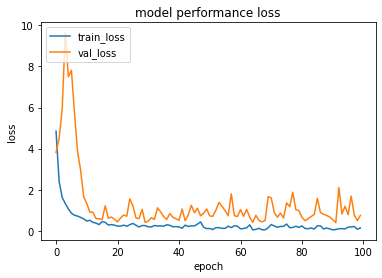

    epoch  accuracy      loss  val_accuracy  val_loss
67     67  0.987118  0.056016      0.932367  0.440913


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 3

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 324ms/step - loss: 4.9919 - accuracy: 0.2201 - val_loss: 4.4894 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_3_model.h5
Epoch 2/100
59/59 [==============================] - 26s 430ms/step - loss: 2.2188 - accuracy: 0.4707 - val_loss: 6.7695 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 19s 320ms/step - loss: 1.6545 - accuracy: 0.5486 - val_loss: 7.1052 - val_accuracy: 0.0483

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 19s 320ms/step - loss: 1.2192 - accuracy: 0.6516 - val_loss: 6.5352 - val_accuracy: 0.0483

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        

1        0        9        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        8        0        0        0        0        0        0        0        0        0    

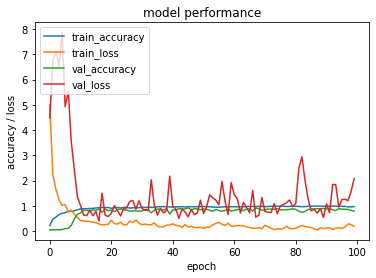

    epoch  accuracy      loss  val_accuracy  val_loss
45     45  0.962963  0.155016      0.922705  0.565016


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 4

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 20s 322ms/step - loss: 5.1342 - accuracy: 0.2276 - val_loss: 4.0318 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_4_model.h5
Epoch 2/100
59/59 [==============================] - 23s 387ms/step - loss: 2.4605 - accuracy: 0.4058 - val_loss: 5.3105 - val_accuracy: 0.0483

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 22s 358ms/step - loss: 1.7021 - accuracy: 0.5373 - val_loss: 7.0159 - val_accuracy: 0.0531

Epoch 00003: val_accuracy improved from 0.04831 to 0.05314, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_4_model.h5
Epoch 4/100
59/59 [==============================] - 23s 389ms/step

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

2        0        0        6        0        0        2        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

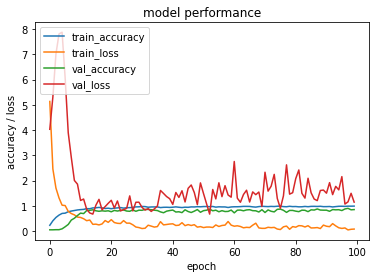

    epoch  accuracy      loss  val_accuracy  val_loss
97     97  0.986044  0.044183      0.898551  1.156594


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 5

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 493s 8s/step - loss: 5.0489 - accuracy: 0.2281 - val_loss: 3.8657 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_5_model.h5
Epoch 2/100
59/59 [==============================] - 30s 419ms/step - loss: 2.3800 - accuracy: 0.4402 - val_loss: 5.2874 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 22s 366ms/step - loss: 1.6108 - accuracy: 0.5582 - val_loss: 6.6743 - val_accuracy: 0.0483

Epoch 00003: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_5_model.h5
Epoch 4/100
59/59 [==============================] - 25s 411ms/step -

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        1        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        

2        0        0        7        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

3        0        0        0        7        0        0        0        0        0        0        0        0        0    

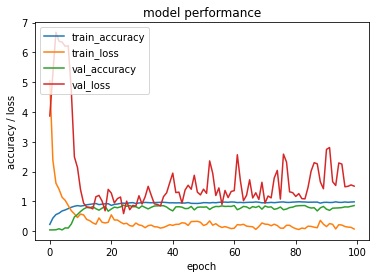

    epoch  accuracy      loss  val_accuracy  val_loss
24     24  0.940955  0.247913      0.874396  0.590399


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 6

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 23s 367ms/step - loss: 5.1280 - accuracy: 0.2319 - val_loss: 4.3946 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_6_model.h5
Epoch 2/100
59/59 [==============================] - 29s 405ms/step - loss: 2.4252 - accuracy: 0.4326 - val_loss: 5.2239 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 22s 363ms/step - loss: 1.7503 - accuracy: 0.5325 - val_loss: 9.2715 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 21s 360ms/step - loss: 1.4236 - accuracy: 0.5969 - val_loss: 7.6920 - val_accuracy: 0.0290

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        1        

2        0        0        7        0        0        0        0        0        0        0        2        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

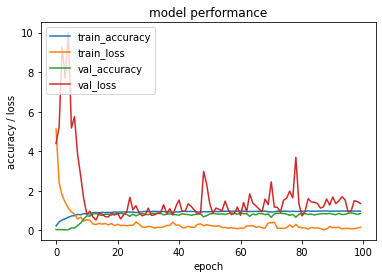

    epoch  accuracy      loss  val_accuracy  val_loss
60     60  0.975309  0.122702      0.898551  0.768969


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 7

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=30, 
                                  horizontal_flip=True,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 680s 11s/step - loss: 5.2965 - accuracy: 0.1981 - val_loss: 4.2842 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_7_model.h5
Epoch 2/100
59/59 [==============================] - 37s 630ms/step - loss: 2.7524 - accuracy: 0.3376 - val_loss: 5.1798 - val_accuracy: 0.0483

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 35s 584ms/step - loss: 2.1298 - accuracy: 0.4428 - val_loss: 6.1921 - val_accuracy: 0.0483

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 35s 582ms/step - loss: 1.7654 - accuracy: 0.4987 - val_loss: 7.3754 - val_accuracy: 0.0290

Epoch 00

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        1        7        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        7        0        0        0        0        0        0        0        0        0    

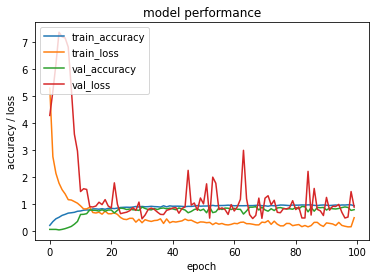

    epoch  accuracy      loss  val_accuracy  val_loss
82     82  0.958132  0.149363      0.903382  0.472981


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 8

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 323ms/step - loss: 4.8155 - accuracy: 0.2228 - val_loss: 4.2381 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_8_model.h5
Epoch 2/100
59/59 [==============================] - 22s 370ms/step - loss: 2.4962 - accuracy: 0.4128 - val_loss: 5.3851 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 325ms/step - loss: 1.6858 - accuracy: 0.5459 - val_loss: 6.1540 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 320ms/step - loss: 1.3311 - accuracy: 0.6162 - val_loss: 6.9903 - val_accuracy: 0.0435

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

2        0        0        8        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

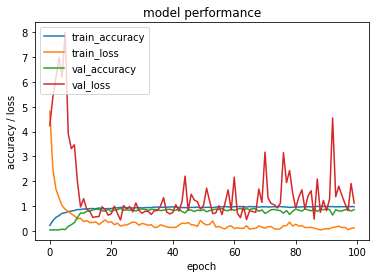

    epoch  accuracy      loss  val_accuracy  val_loss
62     62   0.98336  0.104363      0.913043  0.534984


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 9

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 22s 343ms/step - loss: 5.1006 - accuracy: 0.2190 - val_loss: 4.2237 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_9_model.h5
Epoch 2/100
59/59 [==============================] - 22s 368ms/step - loss: 2.4077 - accuracy: 0.4208 - val_loss: 5.4124 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 20s 338ms/step - loss: 1.6707 - accuracy: 0.5491 - val_loss: 6.2378 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 328ms/step - loss: 1.4296 - accuracy: 0.6012 - val_loss: 6.1518 - val_accuracy: 0.0483

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        0        0        0        0        1        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        1        0        0        0        0        0        0        0        0    

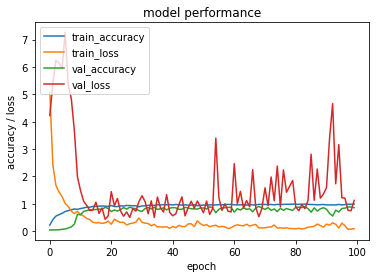

    epoch  accuracy      loss  val_accuracy  val_loss
68     68  0.978529  0.114887      0.903382  0.524832


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 10

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 324ms/step - loss: 4.9732 - accuracy: 0.2432 - val_loss: 4.1777 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_2/_fold_10_model.h5
Epoch 2/100
59/59 [==============================] - 21s 353ms/step - loss: 2.5095 - accuracy: 0.4348 - val_loss: 5.8884 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 20s 339ms/step - loss: 1.7583 - accuracy: 0.5486 - val_loss: 6.5813 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 321ms/step - loss: 1.4074 - accuracy: 0.6227 - val_loss: 5.4828 - val_accuracy: 0.0773

Epoch 

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        5        1        0        1        0        0        0        0        0        0        0        0        1        0        0        1        0        0        0        0        0        0        

2        0        1        6        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        1        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

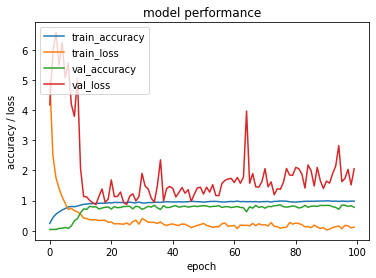

    epoch  accuracy      loss  val_accuracy  val_loss
75     75  0.987654  0.081936      0.855072  1.373311


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###EVALUASI KESELURUHAN

In [ ]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/Dataset_Skripsi/' +"model_2/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

##PERCOBAAN 3

###CROSS VALIDATION EVALUASI 3

In [ ]:
def cross_validation_model_evaluate(model,  valData, i):
  val_datagen = ImageDataGenerator(rescale=1./255,)
  valData = df_train_val.iloc[val_index]
  val_generator = val_datagen.flow_from_dataframe(
        dataframe=valData,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
  Y_pred = model.predict(val_generator,)
  y_pred = np.argmax(Y_pred, axis=1)
  y_test = val_generator.classes
  cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
  print(cm)
  eval_csv = '/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log'
  eval_csv = pd.read_csv(eval_csv, )
  plt.plot(eval_csv['accuracy'])
  plt.plot(eval_csv['val_accuracy'])
  plt.title('model performance')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train_accuracy','val_accuracy'], loc='upper left')
  plt.show()
  ##
  plt.plot(eval_csv['loss'])
  plt.plot(eval_csv['val_loss'])
  plt.title('model performance loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train_loss', 'val_loss'], loc='upper left')
  plt.show()
  eval_csv = eval_csv[(eval_csv.val_accuracy == eval_csv.val_accuracy.max())]
  eval_csv = eval_csv[(eval_csv.val_loss== eval_csv.val_loss.min())]
  print(eval_csv)

###K = 1

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 324ms/step - loss: 4.8337 - accuracy: 0.1975 - val_loss: 4.5210 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_1_model.h5
Epoch 2/100
59/59 [==============================] - 27s 456ms/step - loss: 2.4881 - accuracy: 0.4026 - val_loss: 5.1546 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 20s 329ms/step - loss: 1.6968 - accuracy: 0.5395 - val_loss: 6.9467 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 318ms/step - loss: 1.4983 - accuracy: 0.5926 - val_loss: 6.6771 - val_accuracy: 0.0435

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        6        0        0        1        0        0        0        0        0        1        0        0        0        0        0        1        0        0        0        0        0        0        

2        0        1        6        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        7        0        0        0        0        0        1        0        0        0    

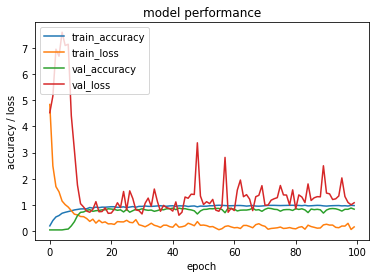

    epoch  accuracy      loss  val_accuracy  val_loss
58     58  0.964037  0.200051      0.879227  0.718207


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 1:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 2

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 624s 10s/step - loss: 5.0445 - accuracy: 0.2373 - val_loss: 3.7643 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_2_model.h5
Epoch 2/100
59/59 [==============================] - 25s 335ms/step - loss: 2.4034 - accuracy: 0.4300 - val_loss: 6.8622 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 17s 286ms/step - loss: 1.7365 - accuracy: 0.5497 - val_loss: 6.7424 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 17s 282ms/step - loss: 1.3703 - accuracy: 0.6189 - val_loss: 5.9373 - val_accuracy: 0.0435

Epoch 00

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        0        0        0        1        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

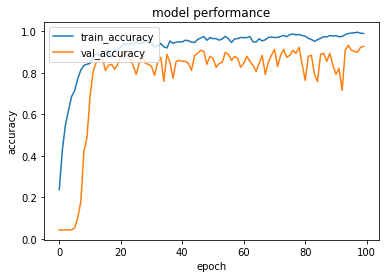

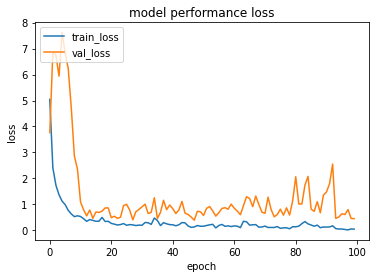

    epoch  accuracy      loss  val_accuracy  val_loss
94     94  0.988728  0.054471      0.932367  0.514029


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 2:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 3

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 289ms/step - loss: 4.9108 - accuracy: 0.2287 - val_loss: 3.8470 - val_accuracy: 0.0483

Epoch 00001: val_accuracy improved from -inf to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_3_model.h5
Epoch 2/100
59/59 [==============================] - 21s 355ms/step - loss: 2.1490 - accuracy: 0.4713 - val_loss: 4.4341 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04831
Epoch 3/100
59/59 [==============================] - 17s 284ms/step - loss: 1.3670 - accuracy: 0.6001 - val_loss: 5.5589 - val_accuracy: 0.0386

Epoch 00003: val_accuracy did not improve from 0.04831
Epoch 4/100
59/59 [==============================] - 17s 283ms/step - loss: 1.2026 - accuracy: 0.6640 - val_loss: 5.4861 - val_accuracy: 0.0870

Epoch 0

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        9        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        8        0        0        0        0        0        0        1        0        0    

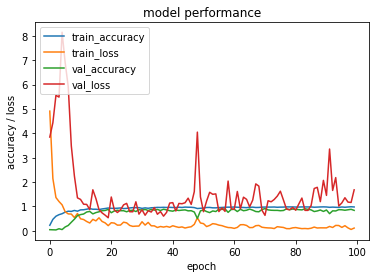

    epoch  accuracy      loss  val_accuracy  val_loss
70     70  0.976382  0.131186      0.913043  0.635925


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 3:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 4

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 19s 301ms/step - loss: 5.0987 - accuracy: 0.2083 - val_loss: 4.1128 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_4_model.h5
Epoch 2/100
59/59 [==============================] - 19s 322ms/step - loss: 2.4412 - accuracy: 0.4316 - val_loss: 5.5592 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 317ms/step - loss: 1.7066 - accuracy: 0.5507 - val_loss: 6.1120 - val_accuracy: 0.0483

Epoch 00003: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_4_model.h5
Epoch 4/100
59/59 [==============================] - 17s 293ms/step

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

2        0        1        6        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

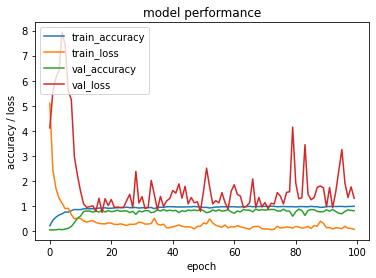

    epoch  accuracy      loss  val_accuracy  val_loss
67     67  0.973698  0.182485      0.874396  0.932976


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 4:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 5

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 241s 4s/step - loss: 4.9680 - accuracy: 0.2297 - val_loss: 4.1262 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_5_model.h5
Epoch 2/100
59/59 [==============================] - 24s 400ms/step - loss: 2.3624 - accuracy: 0.4219 - val_loss: 7.8794 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 18s 307ms/step - loss: 1.5837 - accuracy: 0.5711 - val_loss: 6.4966 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 17s 283ms/step - loss: 1.2419 - accuracy: 0.6538 - val_loss: 9.7705 - val_accuracy: 0.0435

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        1        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        

2        0        0        7        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        

3        0        0        0        5        0        0        0        0        0        0        2        0        0    

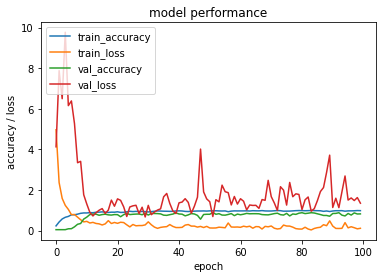

    epoch  accuracy     loss  val_accuracy  val_loss
51     51  0.970478  0.12416      0.888889  0.689169


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 5:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 6

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 658s 11s/step - loss: 4.8095 - accuracy: 0.2303 - val_loss: 4.1944 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_6_model.h5
Epoch 2/100
59/59 [==============================] - 23s 389ms/step - loss: 2.4850 - accuracy: 0.4138 - val_loss: 5.9721 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 20s 338ms/step - loss: 1.7514 - accuracy: 0.5319 - val_loss: 7.6756 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 19s 325ms/step - loss: 1.2763 - accuracy: 0.6329 - val_loss: 8.5342 - val_accuracy: 0.0773

Epoch 00

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        10       0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        7        0        1        1        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        

2        0        0        6        0        1        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        1        0        

3        0        0        0        10       0        0        0        0        0        0        0        0        0    

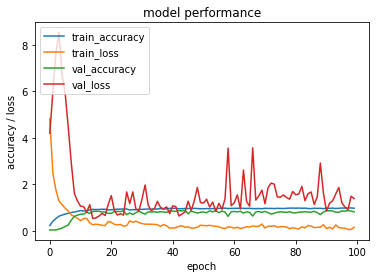

    epoch  accuracy     loss  val_accuracy  val_loss
44     44  0.966184  0.15491      0.888889   0.81707


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 6:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 7

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 21s 321ms/step - loss: 4.8698 - accuracy: 0.2292 - val_loss: 4.4163 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_7_model.h5
Epoch 2/100
59/59 [==============================] - 25s 410ms/step - loss: 2.6056 - accuracy: 0.4230 - val_loss: 5.1772 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 19s 323ms/step - loss: 1.8937 - accuracy: 0.5250 - val_loss: 5.8715 - val_accuracy: 0.0483

Epoch 00003: val_accuracy improved from 0.04348 to 0.04831, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_7_model.h5
Epoch 4/100
59/59 [==============================] - 20s 344ms/step

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        

2        0        0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        8        0        0        0        0        0        0        0        0        0    

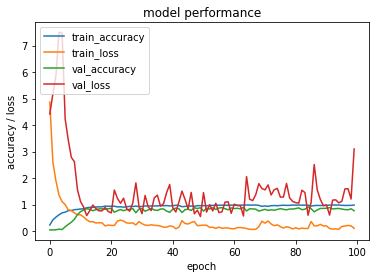

    epoch  accuracy      loss  val_accuracy  val_loss
84     84  0.979603  0.098061      0.913043  0.597305


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 7:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 8

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 538s 8s/step - loss: 4.9235 - accuracy: 0.2249 - val_loss: 4.4408 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_8_model.h5
Epoch 2/100
59/59 [==============================] - 24s 402ms/step - loss: 2.6059 - accuracy: 0.3945 - val_loss: 6.1200 - val_accuracy: 0.0290

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 22s 368ms/step - loss: 1.7989 - accuracy: 0.5314 - val_loss: 6.2178 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 20s 339ms/step - loss: 1.4767 - accuracy: 0.5802 - val_loss: 8.5398 - val_accuracy: 0.0531

Epoch 000

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        6        1        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        1        0        

2        0        1        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

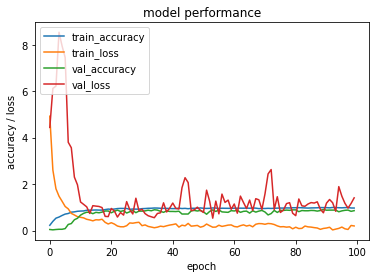

    epoch  accuracy     loss  val_accuracy  val_loss
89     89  0.986044  0.08958      0.908213  0.762078


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 8:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 9

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 22s 351ms/step - loss: 5.0148 - accuracy: 0.2249 - val_loss: 3.9658 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_9_model.h5
Epoch 2/100
59/59 [==============================] - 24s 406ms/step - loss: 2.4837 - accuracy: 0.4165 - val_loss: 5.1436 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 22s 366ms/step - loss: 1.7900 - accuracy: 0.5341 - val_loss: 5.8233 - val_accuracy: 0.0628

Epoch 00003: val_accuracy improved from 0.04348 to 0.06280, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_9_model.h5
Epoch 4/100
59/59 [==============================] - 21s 355ms/step

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

2        0        0        8        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

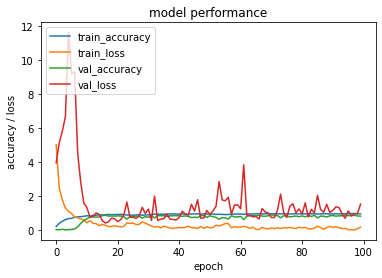

    epoch  accuracy      loss  val_accuracy  val_loss
70     70  0.974772  0.154212      0.908213  0.752923


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 9:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###K = 10

####TRAINING

In [ ]:
k = 10
kf =  StratifiedKFold(n_splits = k, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    print('Train shape:',df_train_val.iloc[train_index].shape)
    print('val shape:', df_train_val.iloc[val_index].shape)
    datagen = ImageDataGenerator( rescale=1./255,)

    csv_filepath = CSVLogger('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
    
    model_checkpoint_callback = ModelCheckpoint(
      filepath='/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5',
      save_weights_only=False,
      monitor='val_accuracy',
      mode='max',
      verbose=1,
      save_best_only=True)
    
    csvlogger = csv_filepath
    callbacks = []
    callbacks.append(csvlogger)
    callbacks.append(model_checkpoint_callback)

    train_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[train_index], 
        x_col="path", 
        y_col="label", 
        shuffle=True, 
        target_size=(224,224),
        class_mode="categorical",) 
  
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_train_val.iloc[val_index], 
        x_col="path", 
        y_col="label", 
        shuffle=False, 
        target_size=(224,224),
        class_mode="categorical",)
    optimizer = Adam(learning_rate=0.0001)
    # model = model((224, 224, 3), 23,name="model_1_balanced_with_aug")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    result = model.fit(x=train_generator,validation_data=val_generator, epochs=100, callbacks=callbacks )
    break
  i += 1

Train shape: (1863, 2)
val shape: (207, 2)
Found 1863 validated image filenames belonging to 23 classes.
Found 207 validated image filenames belonging to 23 classes.
Epoch 1/100
59/59 [==============================] - 22s 352ms/step - loss: 5.2877 - accuracy: 0.2142 - val_loss: 4.2057 - val_accuracy: 0.0435

Epoch 00001: val_accuracy improved from -inf to 0.04348, saving model to /content/drive/MyDrive/Dataset_Skripsi/model_3/_fold_10_model.h5
Epoch 2/100
59/59 [==============================] - 22s 366ms/step - loss: 2.4993 - accuracy: 0.4214 - val_loss: 5.3217 - val_accuracy: 0.0435

Epoch 00002: val_accuracy did not improve from 0.04348
Epoch 3/100
59/59 [==============================] - 21s 355ms/step - loss: 1.6114 - accuracy: 0.5743 - val_loss: 7.7494 - val_accuracy: 0.0435

Epoch 00003: val_accuracy did not improve from 0.04348
Epoch 4/100
59/59 [==============================] - 20s 338ms/step - loss: 1.2357 - accuracy: 0.6436 - val_loss: 9.3828 - val_accuracy: 0.0676

Epoch 

####EVALUASI

Found 207 validated image filenames belonging to 23 classes.


/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        9        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        6        0        0        1        0        1        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

2        0        0        8        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

3        0        0        0        9        0        0        0        0        0        0        0        0        0    

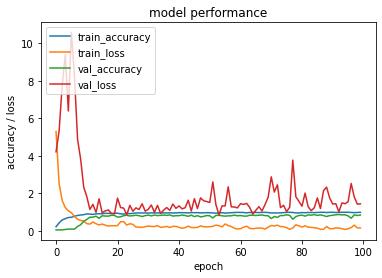

    epoch  accuracy      loss  val_accuracy  val_loss
92     92  0.977456  0.142778      0.864734  1.002703


In [ ]:
n_splits = 10
kf =  StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 666)
i = 1
for train_index, val_index in kf.split(df_train_val['path'], df_train_val['label']):
  if i == 10:
    model_filepath = '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + str(i) + '_model.h5'
    model = load_model(model_filepath)
    cross_validation_model_evaluate(
      model,  df_train_val.iloc[val_index], i, 
       )
    break
  i += 1

###EVALUASI KESELURUHAN

In [ ]:
df_result_experiment = pd.DataFrame()
for i in range(1, 11):
  df_result = pd.read_csv('/content/drive/MyDrive/Dataset_Skripsi/' +"model_3/" + '_fold_' + str(i) + '_model.log')
  df_result = df_result[(df_result.val_accuracy == df_result.val_accuracy.max())]
  df_result = df_result[(df_result.val_loss== df_result.val_loss.min())]
  df_result_experiment = pd.concat([df_result_experiment, df_result])


df_result_experiment = df_result_experiment.reset_index(drop=True)
df_result_experiment.index += 1
pd.set_option('display.max_rows', df_result_experiment.shape[0]+1)
df_average =df_result_experiment.iloc[:].mean(axis=0)
df_result_experiment.loc[11] = df_average
df_result_experiment = df_result_experiment.style.background_gradient(cmap='Accent', subset=df_result_experiment.index[-1])
df_result_experiment

#SKENARIO UJI 3

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test_2,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 100 validated image filenames belonging to 23 classes.
Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        3        0        0        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        

1        0        2        0        0        0        0        0        0        0        0        1        0        1        0        0        0        0        0        0        0        0        0        0        

2        0        0        5        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        2        1        0      

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test_2,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 100 validated image filenames belonging to 23 classes.
Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        4        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        1        1        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        1        0        0        0        0        

2        0        0        3        0        0        0        0        0        0        1        1        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        3        0        0      

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test_2,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/Dataset_Skripsi/' + "model_3/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 100 validated image filenames belonging to 23 classes.
Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        4        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        3        0        0        0        0        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        5        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        1        0        0      

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = val_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory=data_dir,
        x_col="path",
        y_col="label",
        shuffle=False,
        target_size=image_size,
        class_mode="categorical", )
model_filepath =  '/content/drive/MyDrive/Dataset_Skripsi/' + "model/" + '_fold_' + '9' + '_model.h5'
model = load_model(model_filepath)
Y_pred = model.predict(test_generator,)
y_pred = np.argmax(Y_pred, axis=1)
y_test = test_generator.classes
cm = ConfusionMatrix(actual_vector=y_test, predict_vector=y_pred) 
print(cm)

Found 230 validated image filenames belonging to 23 classes.
Predict  0        1        2        3        4        5        6        7        8        9        10       11       12       13       14       15       16       17       18       19       20       21       22       
Actual
0        7        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

1        0        5        0        0        0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

2        0        0        14       0        0        1        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        0        

3        0        0        0        3        0        0      

/usr/local/lib/python3.7/dist-packages/pycm/pycm_obj.py:195: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)


#SKENARIO UJI 2


prediction is cornus


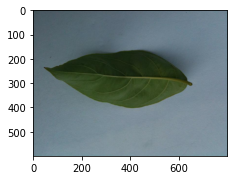

In [ ]:
model_filepath =  '/content/drive/MyDrive/Dataset_Skripsi/' + "model_2/" + '_fold_' + '2' + '_model.h5'
model = load_model(model_filepath)

def plot_img_array(path):
  img = image.load_img(path)
  plt.grid(False)
  plt.imshow(img)


def predict_image(model, google_drive=None):
  if google_drive == None:
    uploaded = files.upload()
    for fn in uploaded.keys():
      path = '/content/' + fn
  else:
    path = google_drive
  image = tf.keras.preprocessing.image.load_img(path,  
                                                  target_size=image_size, )
  input_arr = tf.keras.preprocessing.image.img_to_array(image) / 255
  input_arr = np.array([input_arr]) 
  classes = model.predict(input_arr)
  
  rows = 10
  cols = 2
  plt.figure(figsize=(2*4*cols, 4*rows))  
  index = 1
  plt.subplot(rows, cols * 2, index*2 + 1)
  plot_img_array(path)
  keyList = list(class_names.keys())
  valList = list(class_names.values())
  position = valList.index(np.argmax(classes)) 
  prediction = 'prediction is ' + str(keyList[position])
  print(prediction) 
  if google_drive == None:
    os.remove(path)

def plot_predict_value_array(predictions_array):
  plt.grid(False)
  plt.ylim([0, 1])

predict_image(model, '/content/drive/MyDrive/Dataset_Skripsi/Daun/cornus/12991999498335.jpg')

#Visualisasi

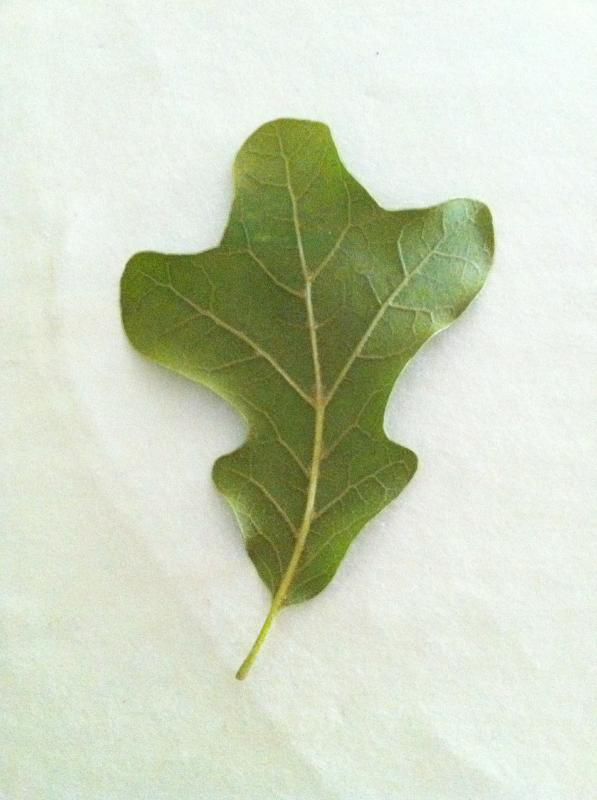

In [ ]:
def visualize_feature_maps(model,n_layer ,rows, cols, path_input, ):
  model = Model(inputs=model.inputs, outputs=model.layers[n_layer].output)
  src_img_filepath = path_input
  img = tf.keras.preprocessing.image.load_img(src_img_filepath, target_size=(224,224))
  # convert the image to an array
  img = img_to_array(img)
  # expand dimensions so that it represents a single 'sample'
  img = np.expand_dims(img, axis=0) / 255
  feature_maps = model.predict(img)
  rows = rows
  cols = cols
  ix = 1
  plt.figure(figsize = (16,16))
  for _ in range(cols):
    for _ in range(rows):
      ax = plt.subplot(cols, rows , ix)
      ax.set_xticks([])
      ax.set_yticks([])
      plt.imshow(feature_maps[0, :, :, ix-1], aspect='auto',   )
      ix += 1
  plt.show()  

image = Image.open('/content/drive/MyDrive/Dataset_Skripsi/Daun/quercus/13292231047435.jpg')
image_array = np.asarray(image)
im = Image.fromarray(np.uint8(image_array))
im   

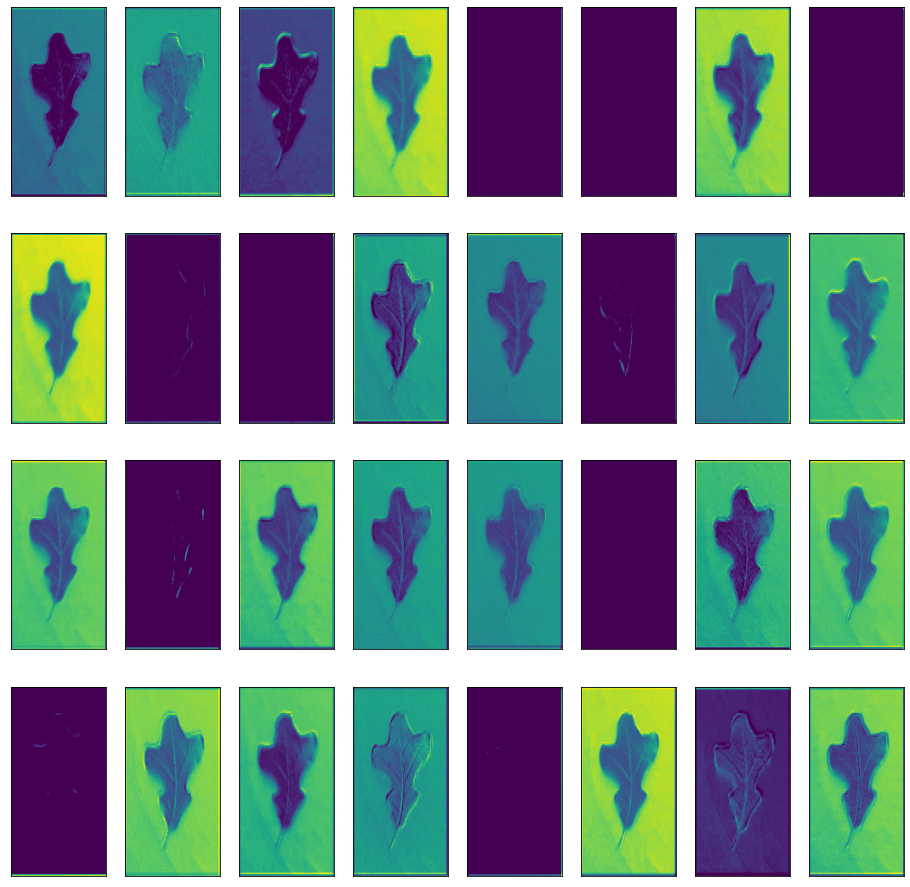

In [ ]:
visualize_feature_maps(model,5,8,4, data_dir + '/quercus/13292231047435.jpg')

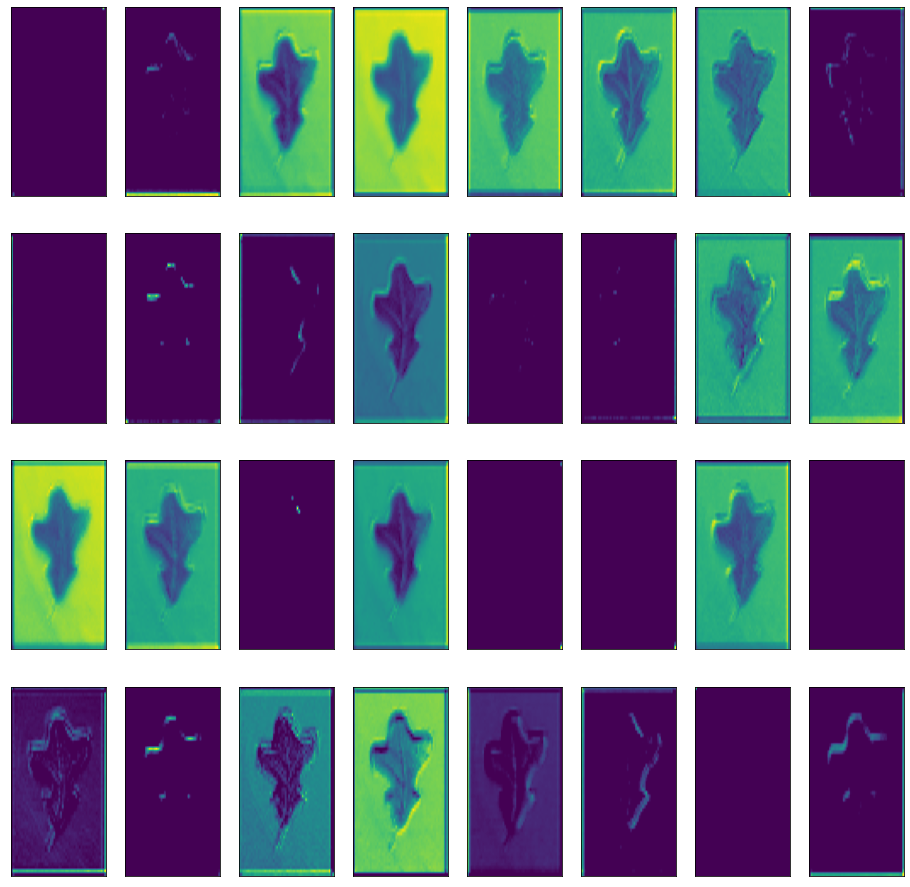

In [ ]:
visualize_feature_maps(model,10,8,4, data_dir + '/quercus/13292231047435.jpg')

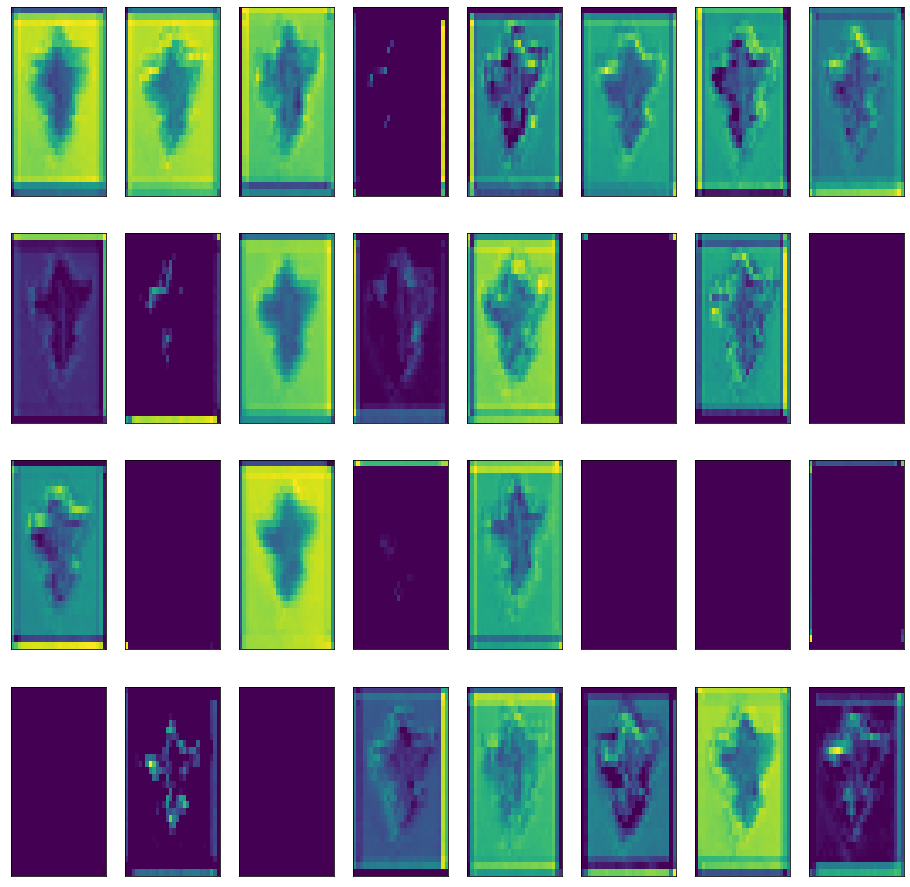

In [ ]:
visualize_feature_maps(model,17,8,4, data_dir + '/quercus/13292231047435.jpg')

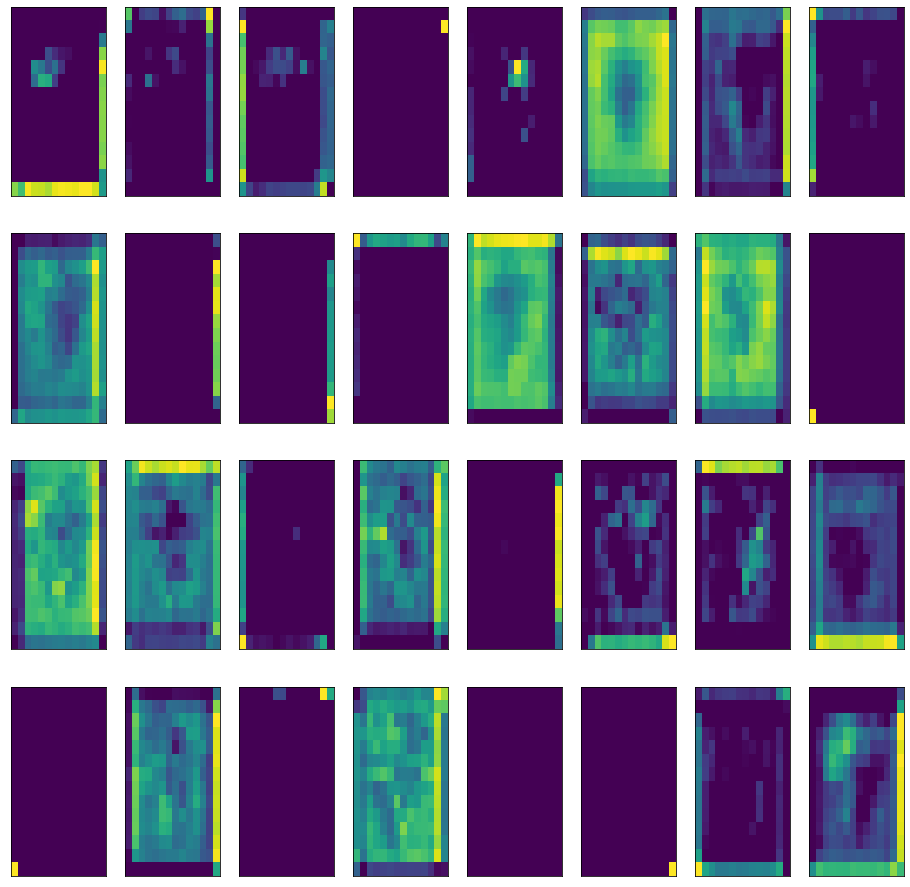

In [ ]:
visualize_feature_maps(model,24,8,4, data_dir + '/quercus/13292231047435.jpg')

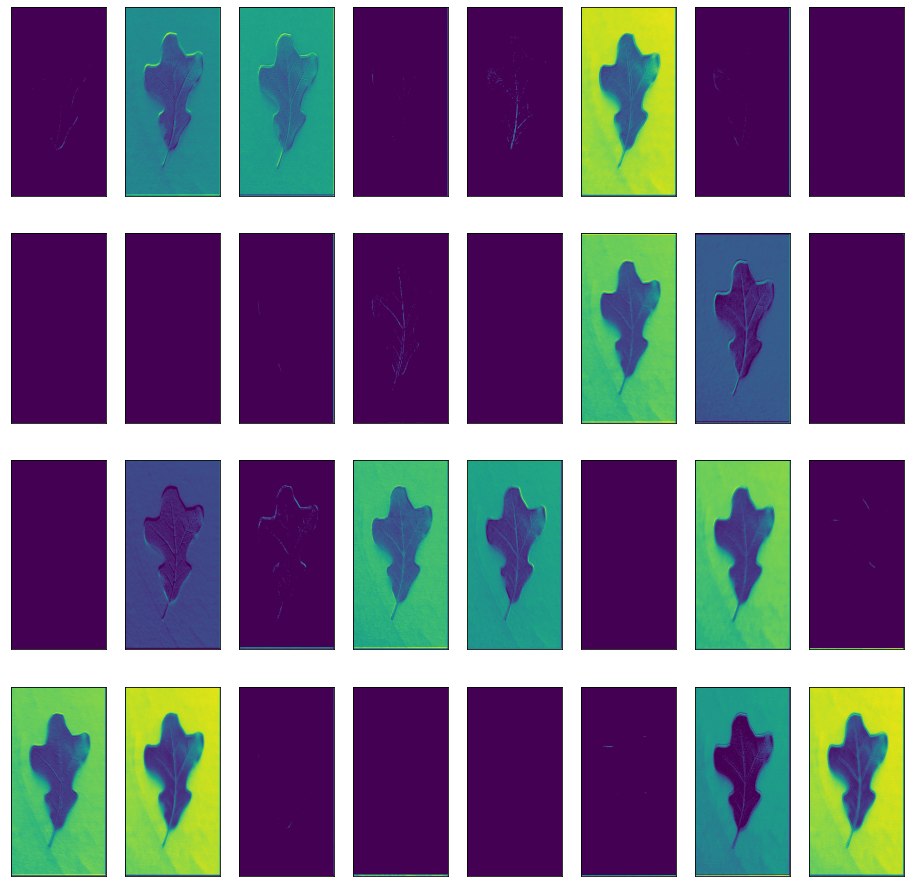

In [ ]:
visualize_feature_maps(model,2,8,4, data_dir + '/quercus/13292231047435.jpg')

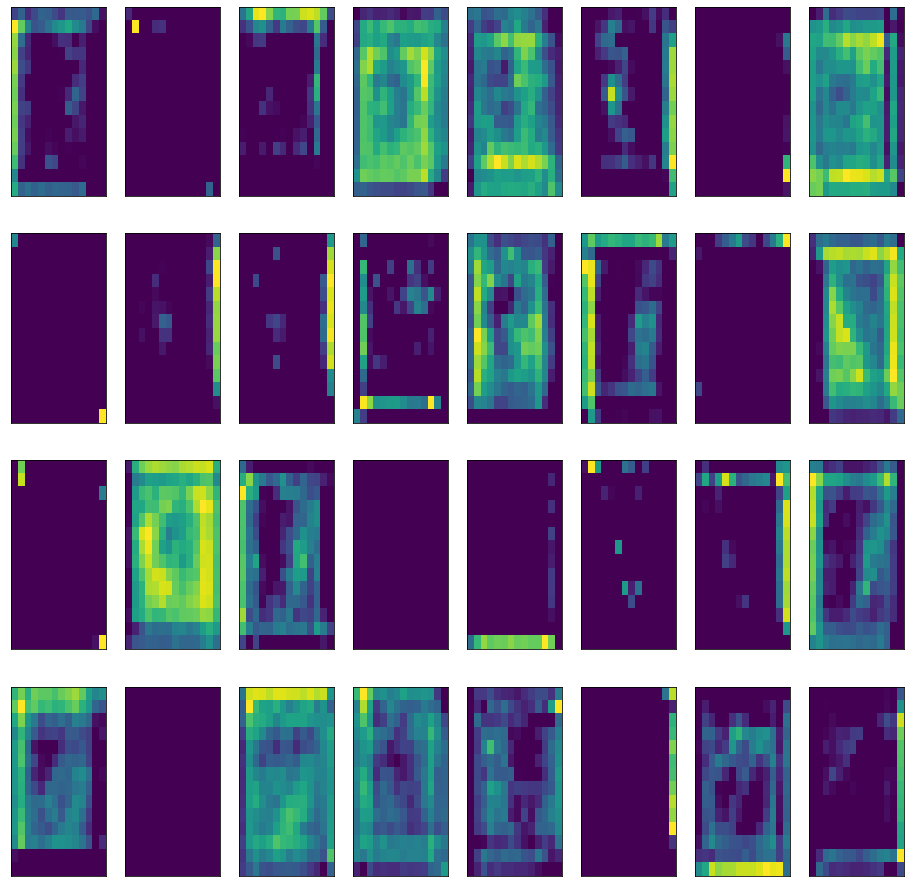

In [ ]:
visualize_feature_maps(model,28,8,4, data_dir + '/quercus/13292231047435.jpg')